## Theano for Problem 3 HW1

In [31]:
import numpy as np
import theano
import theano.tensor as T
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
input = np.array([[-1],[0],[1]])
target = np.array([[-1.5],[0.5],[2.5]])

#### --> changed the input and target 

In [33]:
input

array([[-1],
       [ 0],
       [ 1]])

In [34]:
target

array([[-1.5],
       [ 0.5],
       [ 2.5]])

In [35]:
p = T.dmatrix("p")
t = T.dmatrix("t")

In [36]:
# initialize the weight
w = theano.shared(0., name="w")
# initialize the bias
b = theano.shared(0., name="b")

#### -->changed initial value for w from random to zero

In [37]:
iterations = 1000
a = w*p + b

In [38]:
e = t - a
e2 = T.sqr(e)
perf = T.sum(e2)

In [39]:
gw, gb = T.grad(perf, [w, b])

In [40]:
train = theano.function(
          inputs=[p,t],
          outputs=[a, perf],
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[p], outputs=a)
perform = theano.function(inputs=[p,t], outputs=perf)

# Train,
for i in range(iterations):
    pred, err = train(input, target)

#### --> change learning rate from 0.01 to 0.1 as required

In [41]:
print("Final model:")
print(w.get_value())
print(b.get_value())

Final model:
2.0
0.5


### Plotting network response

In [42]:
x = np.array([np.arange(-1.5, 1.5, 0.1)])
x

array([[ -1.50000000e+00,  -1.40000000e+00,  -1.30000000e+00,
         -1.20000000e+00,  -1.10000000e+00,  -1.00000000e+00,
         -9.00000000e-01,  -8.00000000e-01,  -7.00000000e-01,
         -6.00000000e-01,  -5.00000000e-01,  -4.00000000e-01,
         -3.00000000e-01,  -2.00000000e-01,  -1.00000000e-01,
          1.33226763e-15,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00,   1.10000000e+00,
          1.20000000e+00,   1.30000000e+00,   1.40000000e+00]])

In [43]:
y = predict(x)
y

array([[-2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5,
        -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,
         1.9,  2.1,  2.3,  2.5,  2.7,  2.9,  3.1,  3.3]])

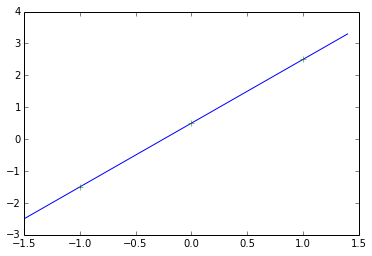

In [44]:
plt.plot(x[0], y[0])
plt.plot(input, target,'+')
plt.show()